In [1]:
import pandas as pd

df = pd.read_csv('FimaNFipClaims.csv')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6648\1002532781.py:3: DtypeWarning: Columns (7,25,32,35,38,42,51,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('FimaNFipClaims.csv')


In [2]:
# print list of columns
print(df.columns)

Index(['agricultureStructureIndicator', 'asOfDate',
       'basementEnclosureCrawlspaceType', 'policyCount',
       'crsClassificationCode', 'dateOfLoss', 'elevatedBuildingIndicator',
       'elevationCertificateIndicator', 'elevationDifference',
       'baseFloodElevation', 'ratedFloodZone', 'houseWorship',
       'locationOfContents', 'lowestAdjacentGrade', 'lowestFloorElevation',
       'numberOfFloorsInTheInsuredBuilding', 'nonProfitIndicator',
       'obstructionType', 'occupancyType', 'originalConstructionDate',
       'originalNBDate', 'amountPaidOnBuildingClaim',
       'amountPaidOnContentsClaim',
       'amountPaidOnIncreasedCostOfComplianceClaim',
       'postFIRMConstructionIndicator', 'rateMethod',
       'smallBusinessIndicatorBuilding', 'totalBuildingInsuranceCoverage',
       'totalContentsInsuranceCoverage', 'yearOfLoss',
       'primaryResidenceIndicator', 'buildingDamageAmount',
       'buildingDeductibleCode', 'netBuildingPaymentAmount',
       'buildingPropertyValu

21216


<Axes: xlabel='longitude', ylabel='latitude'>

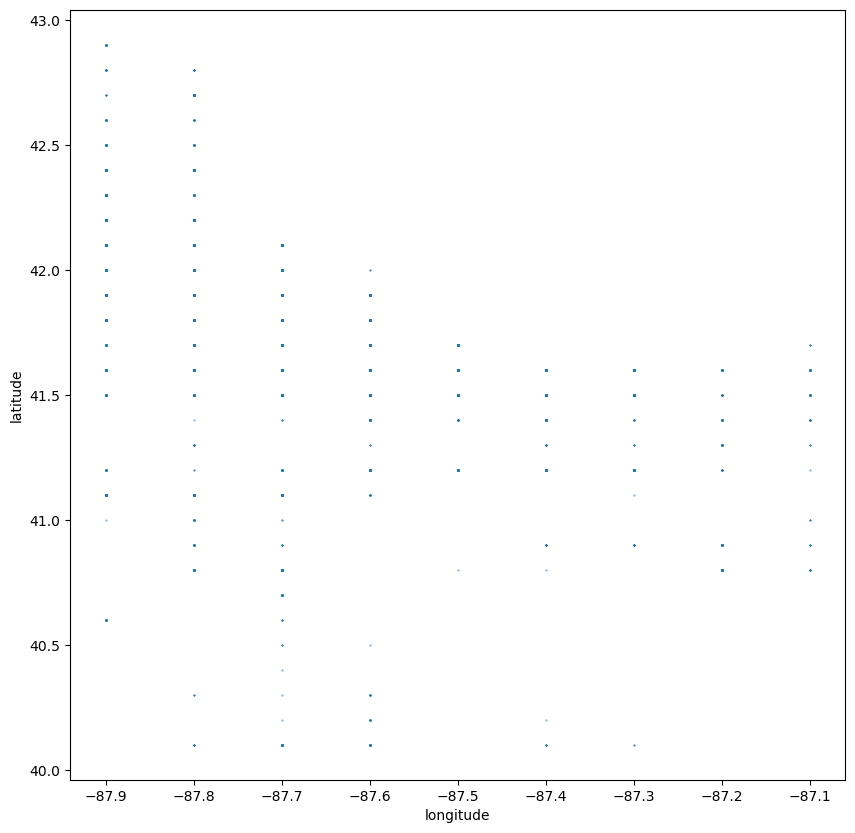

In [8]:
# keep the columns longitude, latitude, and amountpaidonbuildingclaim

claims = df[['longitude', 'latitude', 'reportedZipCode','causeOfDamage']]
# only keep claims with -88 < longitude < -86 and 40 < latitude < 43
claims = claims[(claims['longitude'] > -88) & (claims['longitude'] < -87) & (claims['latitude'] > 40) & (claims['latitude'] < 43)]
# get the length of the dataframe
print(len(claims))
# plot the claims
claims.plot.scatter('longitude', 'latitude', s=0.1, figsize=(10,10))

In [9]:
zip_codes = pd.read_csv('Zip_codes.csv')
zip_codes = zip_codes[['the_geom', 'ZIP']]
zip_codes.head()

,the_geom,ZIP
0,MULTIPOLYGON (((-87.67762151065281 41.91775780...,60647
1,MULTIPOLYGON (((-87.72683253163021 41.92264626...,60639
2,MULTIPOLYGON (((-87.78500237831095 41.90914785...,60707
3,MULTIPOLYGON (((-87.6670686895295 41.888851884...,60622
4,MULTIPOLYGON (((-87.70655631674127 41.89555340...,60651


In [19]:
zip_codes = pd.read_csv('Zip_codes.csv')
zip_codes = zip_codes[['the_geom', 'ZIP']]
zip_codes.head()
# loop through flood_claims zip_code, and query zip_codes in zip_code data_frame and fetch the_geom
zip_codes_geom = []
for zip_code in claims['reportedZipCode']:
    # if the zipcode is NaN, skip it
    if zip_code != zip_code:
        continue
    if len(zip_codes[zip_codes['ZIP'] == int(zip_code)]['the_geom'].values) == 0:
        continue
    zip_codes_geom.append((zip_codes[zip_codes['ZIP'] == int(zip_code)]['the_geom'].values, zip_code))
# convert zip_codes_geom to a data_frame
zip_codes_geom = pd.DataFrame(zip_codes_geom)

zip_codes_geom.head()
# drop fist two rows 
# zip_codes_geom = zip_codes_geom.drop([0,1])
# print all the zip_codes_geom where 0 is empty
# print(zip_codes_geom[zip_codes_geom[0].apply(lambda x: len(x) == 0)])
# sort the zip_codes_geom by the number of claims
# zip_codes_geom = zip_codes_geom.sort_values(by=[2], ascending=False)
# print the top 5 zip_codes_geom
zip_codes_geom.head()
len(zip_codes_geom)

1017

In [20]:
zip_to_coordinates = {}
for i in zip_codes_geom.values:
    stringo = i[0][0]
    # remove the word 'MULTIPOLYGON' from the string and ((())) from the string
    stringo = stringo.replace('MULTIPOLYGON (((', '')
    stringo = stringo.replace('(', '')
    stringo = stringo.replace(')', '')
    # separate the string by commas
    locations = stringo.split(',')
    # create a new list to store the coordinates
    coordinates = []
    # loop through the locations and separate the coordinates
    for location in locations:
        # separate the coordinates by spaces
        coordinate = location.strip().split(' ')
        # append the coordinates to the coordinates list
        coordinates.append(coordinate)
        zip_to_coordinates[i[1]] = coordinates
print(zip_to_coordinates.keys())
print(zip_to_coordinates[60628])

dict_keys([60628.0, 60707.0, 60655.0, 60631.0, 60657.0, 60620.0, 60625.0, 60641.0, 60633.0, 60610.0, 60660.0, 60608.0, 60613.0, 60618.0, 60647.0, 60614.0, 60659.0, 60639.0, 60644.0, 60827.0, 60652.0, 60612.0, 60629.0, 60656.0, 60634.0, 60630.0, 60646.0, 60617.0, 60638.0, 60649.0, 60619.0, 60640.0, 60622.0, 60643.0, 60606.0, 60623.0, 60602.0, 60651.0, 60654.0, 60609.0, 60607.0, 60645.0, 60624.0, 60636.0, 60621.0, 60637.0, 60653.0, 60642.0, 60616.0, 60604.0, 60626.0, 60611.0, 60603.0, 60632.0, 60615.0, 60601.0])
[['-87.58514614909825', '41.72160409167609'], ['-87.58517833740382', '41.72135547431203'], ['-87.58518078463328', '41.72127714005931'], ['-87.58517296279072', '41.721070414645304'], ['-87.58517097527536', '41.72101123434432'], ['-87.58516433921372', '41.72081280454085'], ['-87.58515978402883', '41.72067813878673'], ['-87.58515920657457', '41.72066161431884'], ['-87.58514091892627', '41.72012245678719'], ['-87.58513159720987', '41.719833474636125'], ['-87.58511232379837', '41.7195

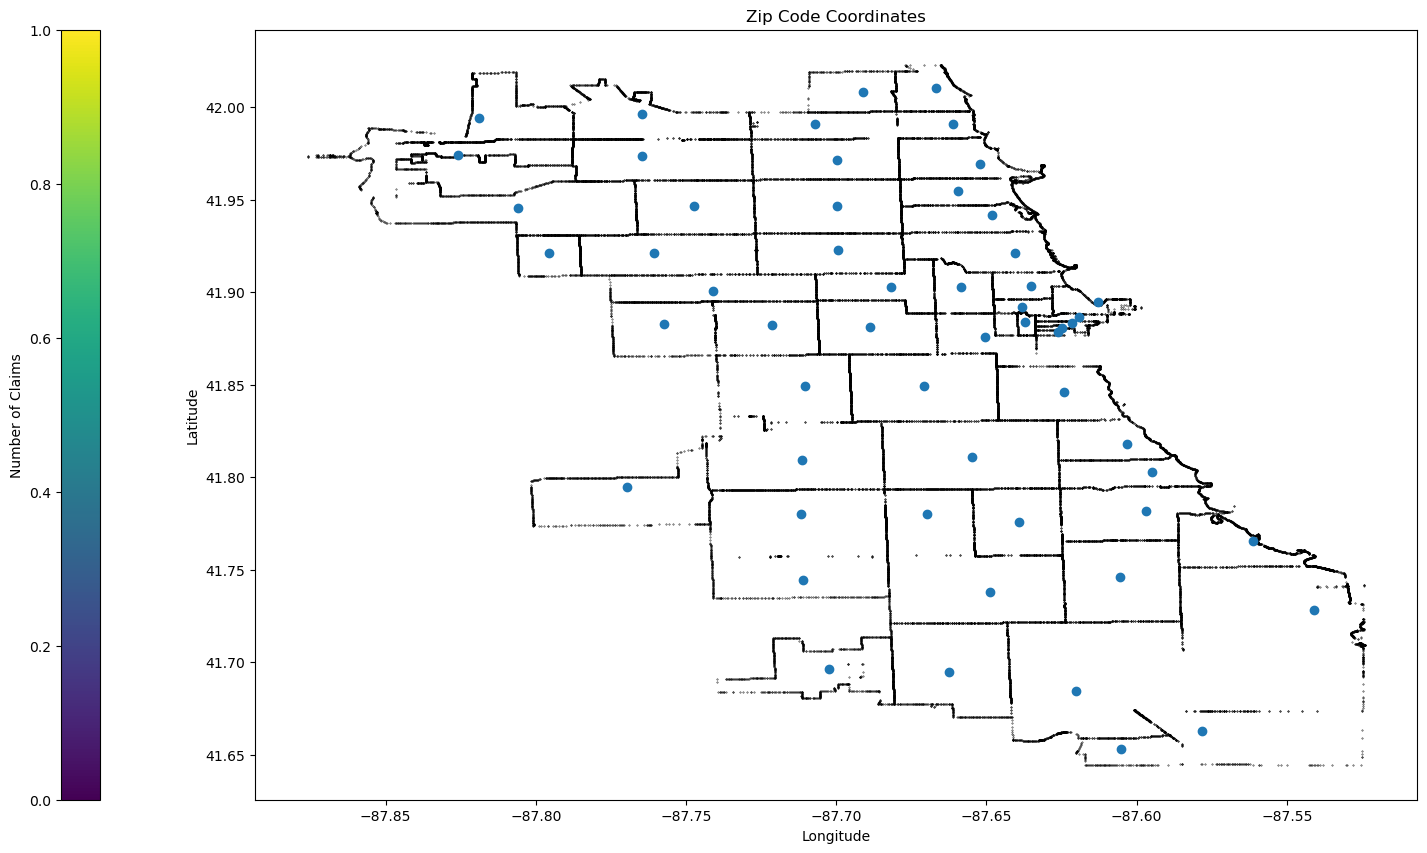

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# create empty lists to store the coordinates
longitudes = []
latitudes = []

long_mean = []
lat_mean = []

# loop through the zip_to_coordinates dictionary and extract the coordinates
for coordinates in zip_to_coordinates.values():
    # take the mean of the coordinates and append them to the lists
    long_mean.append(np.mean([float(coordinate[0]) for coordinate in coordinates]))
    lat_mean.append(np.mean([float(coordinate[1]) for coordinate in coordinates]))
        
    for coordinate in coordinates:
        longitudes.append(float(coordinate[0]))
        latitudes.append(float(coordinate[1]))
        
# increase the size of the plot
plt.figure(figsize=(20, 10))

# plot the coordinates in a scatter plot
plt.scatter(longitudes, latitudes, c='k', s=0.1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Zip Code Coordinates')
# the long_mean and lat_mean are the x, y, the color is the number of claims
plt.scatter(long_mean, lat_mean)
plt.colorbar(label='Number of Claims', location='left')

In [26]:
import pandas as pd
from geopy.geocoders import Nominatim

def get_lat_long(zip_code):
    geolocator = Nominatim(user_agent="check_1")
    location = geolocator.geocode(zip_code)
    return (location.latitude, location.longitude)

get_lat_long('60628')

(41.6942460325614, -87.62387733992982)

In [ ]:
# apply the get_lat_long function to the zip_codes_geom data_frame
lat_long_frame = claims['reportedZipCode'].apply(get_lat_long)
lat_long_frame.head()

In [ ]:
lat_long_frame.head()

In [ ]:
# appy the get_lat_long function to claims['reportedZipCode'] for first 100 rows, and store the result in lat_long_frame list
lat_long_frame = []
# repeat this for the rest of the rows in 100 row increments
for i in range(0, len(claims), 100):
    lat_long_frame.append(claims['reportedZipCode'][i:i+100].apply(get_lat_long))